# Demonstrating how to filter probes before analysis

In [1]:
import numpy as np
import pandas as pd
import math
import time

In [54]:
import methylcheck
# loading previously processed data from methylprep
meta = pd.read_pickle('~/GEO/test_pipeline/GSE49618/sample_sheet_meta_data.pkl')
print(meta.head())
test = pd.read_pickle('~/GEO/test_pipeline/GSE49618/m_values.pkl')
print(test.shape)
test2 = methylcheck.exclude_sex_control_probes(test, '450k', verbose=True)
sketchy_probes_list = methylcheck.list_problem_probes('450k')
test3 = methylcheck.exclude_probes(test2, sketchy_probes_list)

  Cheez BuffyCoat  Sentrix_ID Sentrix_Position Sample_Group Sample_Name  \
0     1         0  6285625091           R05C01         None   8.24 CD34   
1     1         0  7796806148           R03C02         None    7.25 PMN   
2     1         0  7796806148           R01C02         None   7.25 PROS   
3     1         0  6285625091           R06C02         None     9.1 PMN   
4     2         0  6285625091           R03C01         None   8.10 CD19   

  Sample_Plate Sample_Type Sub_Type Sample_Well Pool_ID      GSM_ID Control  \
0         None       Blood    Whole        None    None  GSM1185586   False   
1         None       Blood    Whole        None    None  GSM1185602    True   
2         None       Blood    Whole        None    None  GSM1185600   False   
3         None       Blood    Whole        None    None  GSM1185593   False   
4         None       Blood    Whole        None    None  GSM1185584   False   

                      Sample_ID  
0  GSM1185586_6285625091_R05C01  
1  GSM

In [55]:
%load_ext autoreload
%autoreload 2
from methylize import diff_meth_pos, volcano_plot, manhattan_plot

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
#Install joblib module for parallelization
import sys
!conda install --yes --prefix {sys.prefix} joblib

Solving environment: done

# All requested packages already installed.



## Testing logistic regression

In [57]:
##Run a logistic regression on the methylation data. Must have exactly two phenotypes for logistic regression.
test_results = diff_meth_pos(
    test3,
    meta, column='Cheez',
    regression_method="logistic",
    export=False)

Additional parameters: {'column': 'Cheez', 'export': False}
All samples with the phenotype (2) were assigned a value of 0 and all samples with the phenotype (1) were assigned a value of 1 for the logistic regression analysis.


## Testing Manhattan plot visualizations

NaNs: 8961
Total probes to plot: 130403
CHR-01 13398 | CHR-02 10020 | CHR-03 7510 | CHR-04 5574 | CHR-05 6990 | CHR-06 6567 | CHR-07 7623 | CHR-08 5468 | CHR-09 2771 | CHR-10 6680 | CHR-11 8489 | CHR-12 7194 | CHR-13 3365 | CHR-14 4528 | CHR-15 4345 | CHR-16 5577 | CHR-17 8297 | CHR-18 1947 | CHR-19 7343 | CHR-20 3115 | CHR-21 1238 | CHR-22 2364
p-value line: 1.3010299956639813


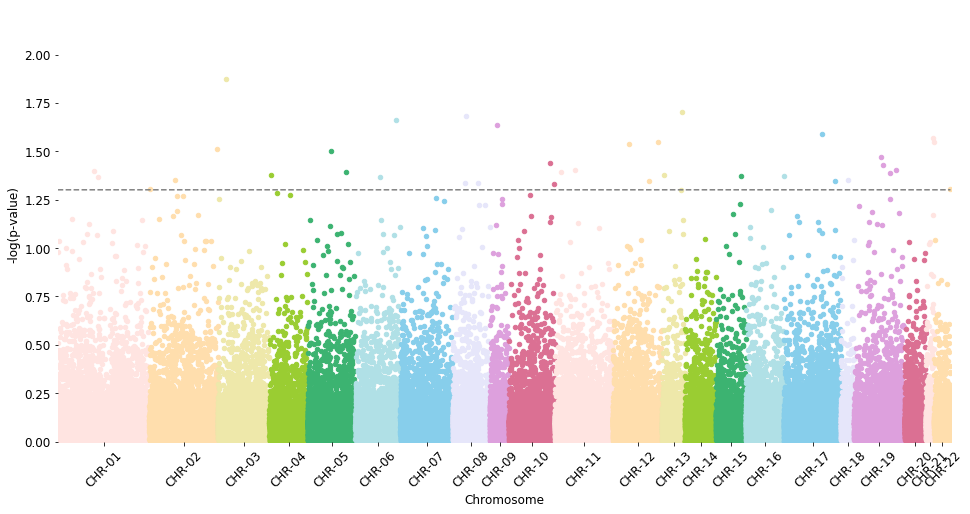

In [58]:
manhattan_plot(test_results, cutoff=0.05, palette='default', save=False) #, label_prefix='')

## Testing linear regression

In [59]:
# Run a linear regression on the methylation data versus age of sample
test_results2 = diff_meth_pos(test3, #test_M_values_T.sample(60000, axis=1), #.iloc[:,:], # ALL probes. slow!
                              meta, column='Cheez',
                              regression_method="linear")

Additional parameters: {'column': 'Cheez'}


Total probes to plot: 130403
CHR-01 13398 | CHR-02 10020 | CHR-03 7510 | CHR-04 5574 | CHR-05 6990 | CHR-06 6567 | CHR-07 7623 | CHR-08 5468 | CHR-09 2771 | CHR-10 6680 | CHR-11 8489 | CHR-12 7194 | CHR-13 3365 | CHR-14 4528 | CHR-15 4345 | CHR-16 5577 | CHR-17 8297 | CHR-18 1947 | CHR-19 7343 | CHR-20 3115 | CHR-21 1238 | CHR-22 2364
p-value line: 6.0


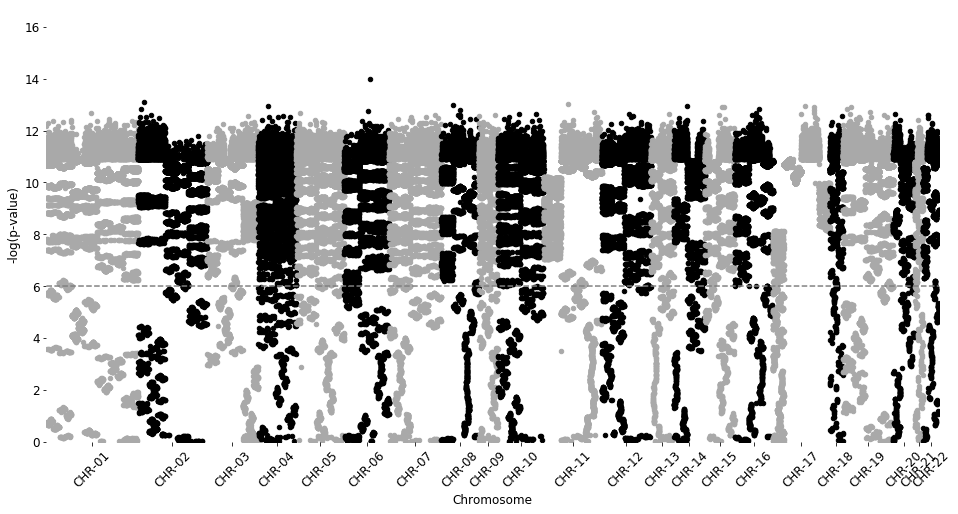

In [62]:
manhattan_plot(test_results2, cutoff=0.000001, palette='Gray3', save=False)

## Testing Volcano plot visualizations

Excluded 801 probes outside of the specified beta coefficient range: (-0.05, 0.05)


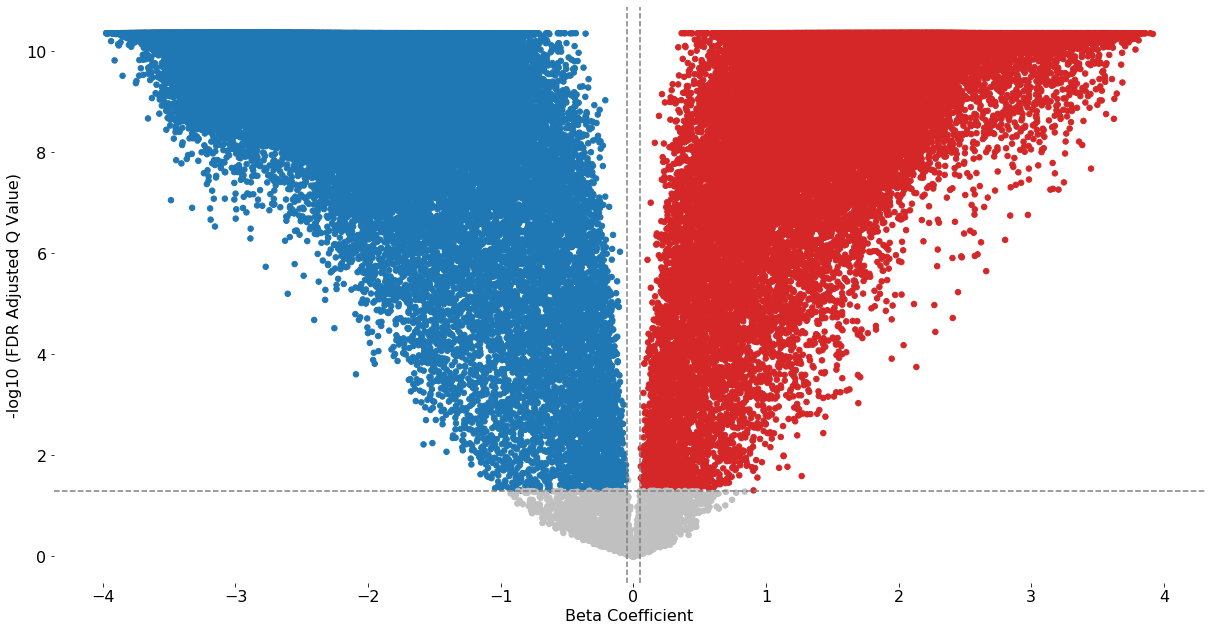

In [63]:
volcano_plot(test_results2, fontsize=16, cutoff=0.05, beta_coefficient_cutoff=(-0.05,0.05), save=False)